# Install and load all libraries

In [1]:
import os
os.environ['CUDA_VISIBLE_DEVICES'] = "1"

In [5]:
from ml_utils import *
from fastai.vision.all import *

# Creating the base datablock specification

In [7]:
dblock = DataBlock(
    blocks=(ImageBlock,CategoryBlock(vocab=vocab),CategoryBlock(vocab=vocab),CategoryBlock(vocab=vocab),CategoryBlock(vocab=vocab)),
    n_inp=1,
    get_x=ColReader('image_id'),
    get_y=[ColReader('y1_label'),ColReader('y2_label'),ColReader('y3_label'),ColReader('y4_label')],
    splitter=splitter,
    item_tfms=Resize((180,320), ResizeMethod.Squish),
    batch_tfms=[*aug_transforms(size=(180,320), min_scale=1),Normalize.from_stats(*imagenet_stats)]
)

# Creating different dataloaders for squish, crop and padding

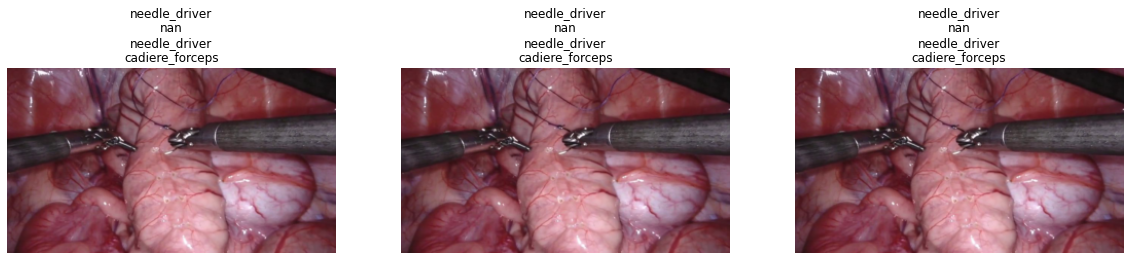

In [8]:
dblock = dblock.new(Resize((180,320), ResizeMethod.Squish))
dls = dblock.dataloaders(images_df, seed=42, n_workers=32)
dls.show_batch(max_n=3, nrows=1, unique=True, figsize=(20,15))

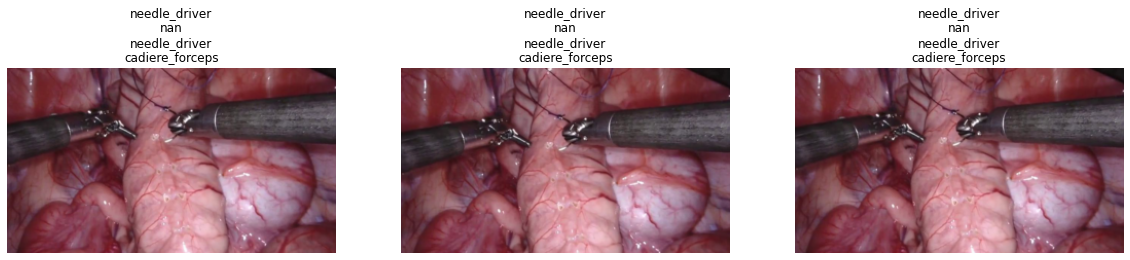

In [9]:
dblock = dblock.new(Resize((180,320), ResizeMethod.Crop))
dls = dblock.dataloaders(images_df, seed=42, n_workers=32)
dls.show_batch(max_n=3, nrows=1, unique=True, figsize=(20,15))

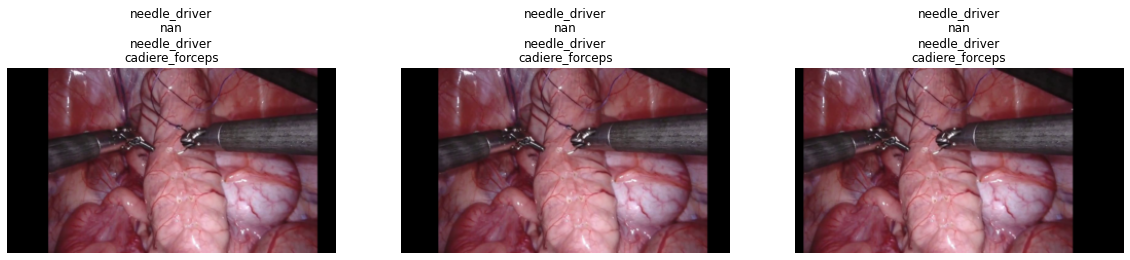

In [10]:
dblock = dblock.new(Resize((180,320), ResizeMethod.Pad, pad_mode='zeros'))
dls = dblock.dataloaders(images_df, seed=42, n_workers=32)
dls.show_batch(max_n=3, nrows=1, unique=True, figsize=(20,15))

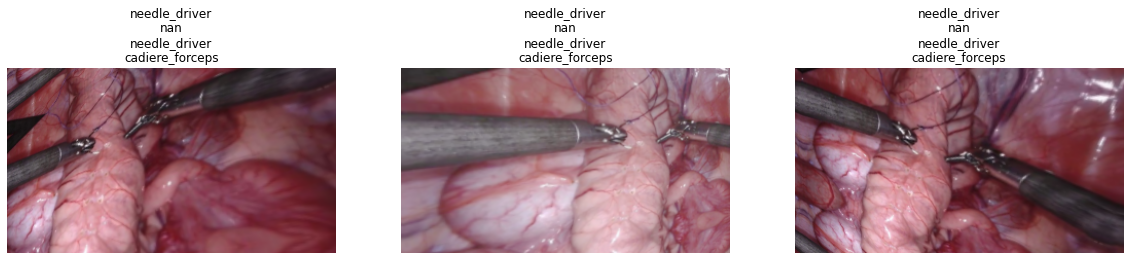

In [11]:
dblock = dblock.new(Resize((180,320), ResizeMethod.Squish),batch_tfms=aug_transforms(mult=2))
dls = dblock.dataloaders(images_df, seed=42, n_workers=32)
dls.show_batch(max_n=3, nrows=1, unique=True, figsize=(20,15))

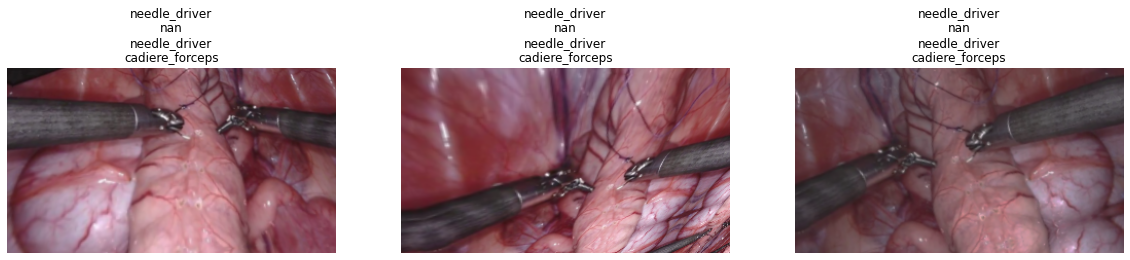

In [12]:
dblock = dblock.new(Resize((180,320), ResizeMethod.Crop),batch_tfms=aug_transforms(mult=2))
dls = dblock.dataloaders(images_df, seed=42, n_workers=32)
dls.show_batch(max_n=3, nrows=1, unique=True, figsize=(20,15))

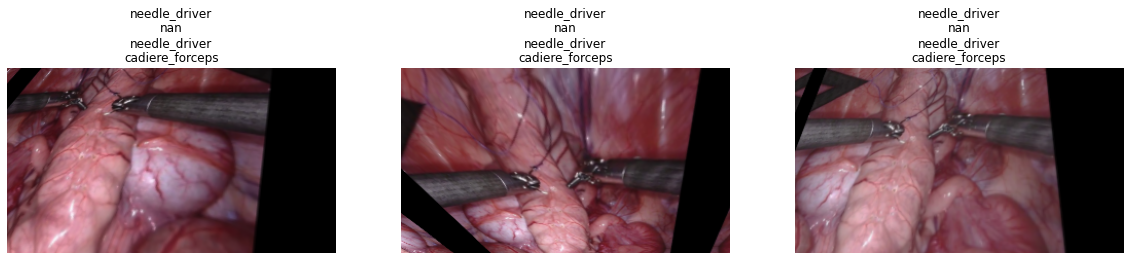

In [13]:
dblock = dblock.new(Resize((180,320), ResizeMethod.Pad, pad_mode='zeros'),batch_tfms=aug_transforms(mult=2))
dls = dblock.dataloaders(images_df, seed=42, n_workers=32)
dls.show_batch(max_n=3, nrows=1, unique=True, figsize=(20,15))

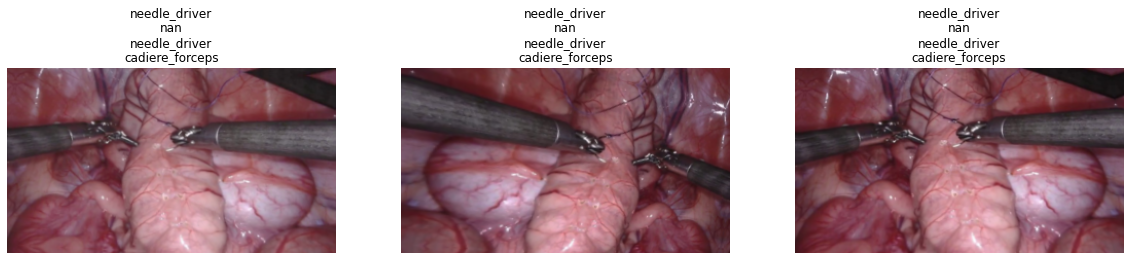

In [15]:
dblock = dblock.new(Resize((180,320), ResizeMethod.Squish),aug_transforms(size=(180,320), min_scale=1))
dls = dblock.dataloaders(images_df, seed=42, n_workers=32)
dls.show_batch(max_n=3, nrows=1, unique=True, figsize=(20,15))

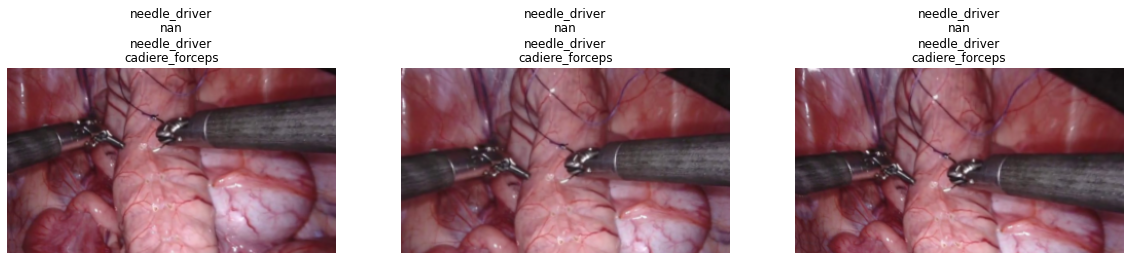

In [16]:
dblock = dblock.new(Resize((180,320), ResizeMethod.Crop),aug_transforms(size=(180,320), min_scale=1))
dls = dblock.dataloaders(images_df, seed=42, n_workers=32)
dls.show_batch(max_n=3, nrows=1, unique=True, figsize=(20,15))

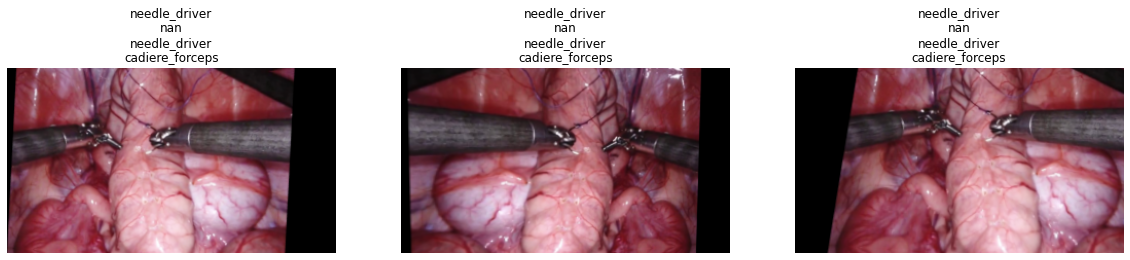

In [17]:
dblock = dblock.new(Resize((180,320), ResizeMethod.Pad, pad_mode='zeros'),aug_transforms(size=(180,320), min_scale=1))
dls = dblock.dataloaders(images_df, seed=42, n_workers=32)
dls.show_batch(max_n=3, nrows=1, unique=True, figsize=(20,15))

There is not much different to these augmentation strategies. We will choose the `Resize((180,320), ResizeMethod.Squish)` and `aug_transforms(size=(180,320), min_scale=1)`